<a href="https://colab.research.google.com/github/Observersss/mss/blob/main/lab_2/lmss_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

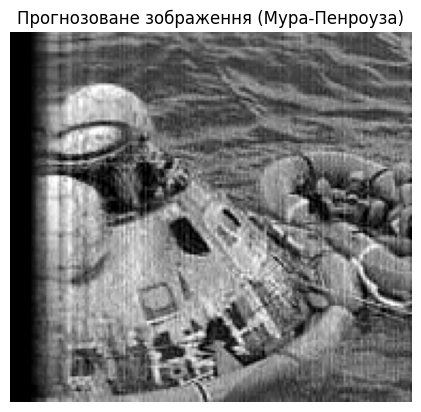


Перевірка для Мура-Пенроуза:
Умова AA+A = A: Виконується
Умова A+AA+ = A+: Виконується
Умова AA+ – симетрична матриця: Виконується
Умова A+A – симетрична матриця: Виконується


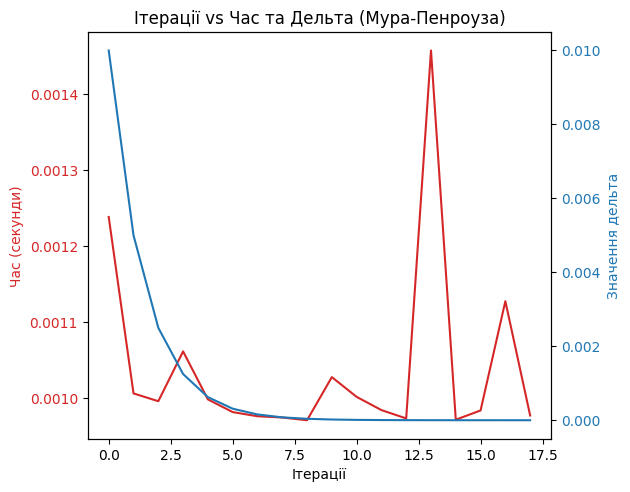

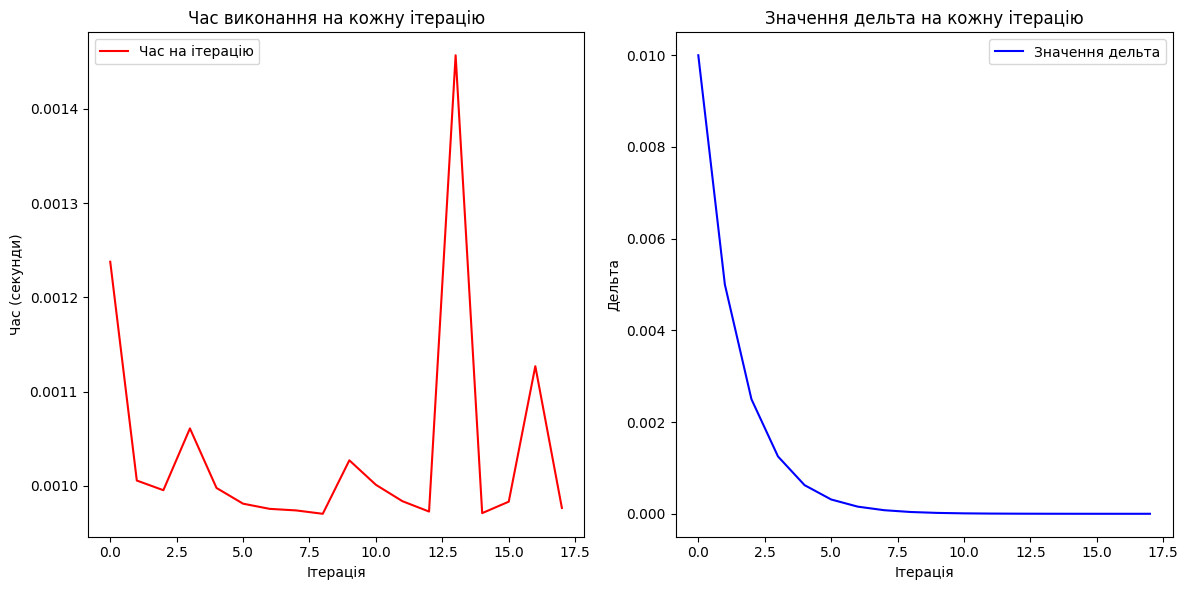

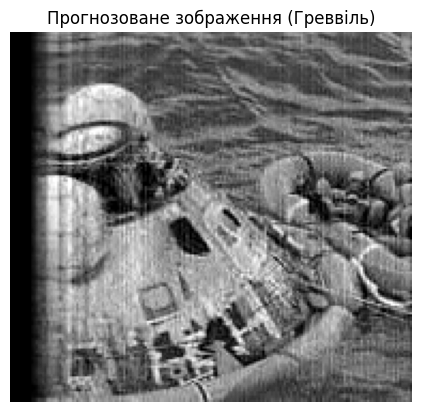

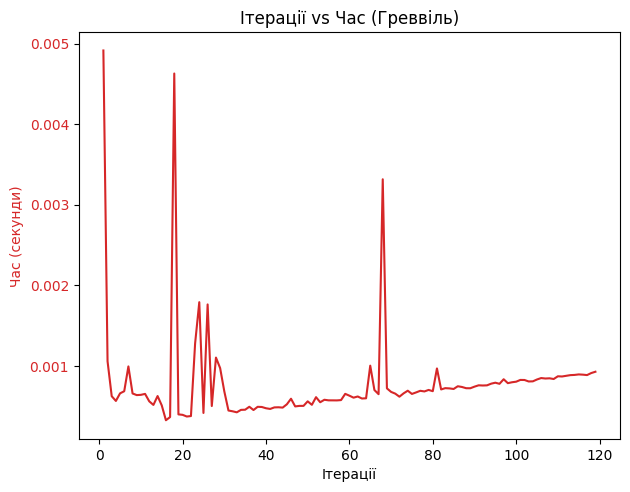


Перевірка для Греввіля:
Умова AA+A = A: Виконується
Умова A+AA+ = A+: Не виконується
Умова AA+ – симетрична матриця: Не виконується
Умова A+A – симетрична матриця: Виконується

--- Інформація про ефективність методу Греввіль ---
Кількість ітерацій:  119
Загальний час: 0.09287 секунд

--- Інформація про ефективність методу Мура-Пенроуза ---
Кількість ітерацій:  18
Значення дельта на останній ітерації:  7.62939453125e-08
Загальний час: 0.01870 секунд


In [40]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

def mura_penrousa(matrix, delta0, epsilon=1e-5, max_iterations=1000):
    E_m = np.eye(matrix.shape[0])
    delta_k = delta0

    iteration_times = []  # Час на кожну ітерацію
    delta_values = []     # Значення дельта на кожній ітерації
    iteration_counts = []  # Номер ітерації

    for k in range(max_iterations):
        start_time = time.time()  # Початок відліку часу

        pseudo_inv_k = matrix.T @ np.linalg.inv(matrix @ matrix.T + delta_k**2 * E_m)
        new_delta_k = delta_k / 2

        # Збереження даних для аналізу
        iteration_times.append(time.time() - start_time)
        delta_values.append(delta_k)
        iteration_counts.append(k)

        # Перевірка на зупинку за критерієм похибки
        if np.linalg.norm(pseudo_inv_k - matrix.T @ np.linalg.inv(matrix @ matrix.T + new_delta_k**2 * E_m)) < epsilon:
            break

        delta_k = new_delta_k

    return pseudo_inv_k, iteration_counts, iteration_times, delta_values

def greville(matrix, delta, eps=1e-5):
    first_row = matrix[0]
    denominator = np.dot(first_row.T, first_row)
    pseudo_inverse = np.vstack(first_row / denominator if denominator != 0 else first_row)

    current_matrix = np.array([first_row])
    num_rows = matrix.shape[0]

    iteration_times = []  # Час на кожну ітерацію Греввіля
    iteration_counts = []  # Номер ітерації Греввіля

    for i in range(1, num_rows):
        start_time = time.time()  # Початок відліку часу для кожної ітерації

        current_row = matrix[i].reshape(-1, 1)
        identity_matrix = np.identity(current_matrix.shape[1])
        projection_matrix = identity_matrix - np.dot(pseudo_inverse, current_matrix)

        current_matrix = np.vstack([current_matrix, matrix[i]])
        denominator = np.dot(current_row.T, np.dot(projection_matrix, current_row))[0, 0]

        if np.abs(denominator) < eps:
            correction_matrix = np.dot(pseudo_inverse, pseudo_inverse.T)
            denominator = 1 + np.dot(current_row.T, np.dot(correction_matrix, current_row))
            pseudo_inverse = np.hstack([
                pseudo_inverse - np.dot(projection_matrix, np.dot(current_row, np.dot(current_row.T, pseudo_inverse))) / denominator,
                np.dot(correction_matrix, current_row) / denominator
            ])
        else:
            pseudo_inverse = np.hstack([
                pseudo_inverse - np.dot(projection_matrix, np.dot(current_row, np.dot(current_row.T, pseudo_inverse))) / denominator,
                np.dot(projection_matrix, current_row) / denominator
            ])

        iteration_times.append(time.time() - start_time)
        iteration_counts.append(i)

    return pseudo_inverse, iteration_counts, iteration_times

def normalize_matrix(matrix):
    """Нормалізує матрицю до діапазону [0, 1]"""
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    return (matrix - min_val) / (max_val - min_val)

def visualize_result(matrix, title):
    """Відображає зображення з матриці"""
    image_normalized = np.clip(matrix * 255, 0, 255).astype(np.uint8)
    image_pred = Image.fromarray(image_normalized)
    plt.imshow(image_pred, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_iterations_vs_time(iteration_counts, iteration_times, delta_values=None, method="Мура-Пенроуза"):
    """Побудова графіків ітерацій, часу та значення дельта (якщо є)"""
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Ітерації')
    ax1.set_ylabel('Час (секунди)', color=color)
    ax1.plot(iteration_counts, iteration_times, color=color, label="Час")
    ax1.tick_params(axis='y', labelcolor=color)

    if delta_values is not None:
        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('Значення дельта', color=color)
        ax2.plot(iteration_counts, delta_values, color=color, label="Дельта")
        ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    if(method == "Мура-Пенроуза"):
      plt.title(f'Ітерації vs Час та Дельта ({method})')
    else:
      plt.title(f'Ітерації vs Час ({method})')
    plt.show()

def plot_performance_summary(iteration_times, delta_values):
    """Побудова окремих графіків для ітерацій, часу та дельта"""
    plt.figure(figsize=(12, 6))

    # Графік часу
    plt.subplot(1, 2, 1)
    plt.plot(range(len(iteration_times)), iteration_times, color='red', label='Час на ітерацію')
    plt.title('Час виконання на кожну ітерацію')
    plt.xlabel('Ітерація')
    plt.ylabel('Час (секунди)')
    plt.legend()

    # Графік значень дельта
    plt.subplot(1, 2, 2)
    plt.plot(range(len(delta_values)), delta_values, color='blue', label='Значення дельта')
    plt.title('Значення дельта на кожну ітерацію')
    plt.xlabel('Ітерація')
    plt.ylabel('Дельта')
    plt.legend()

    plt.tight_layout()
    plt.show()

def display_efficiency_info(iteration_counts, iteration_times, delta_values=None, method="Мура-Пенроуза"):
    """Виведення інформації про ефективність після зображень"""
    print(f"\n--- Інформація про ефективність методу {method} ---")
    print("Кількість ітерацій: ", len(iteration_counts))
    if delta_values is not None:
        print("Значення дельта на останній ітерації: ", delta_values[-1])
    print(f"Загальний час: {sum(iteration_times):.5f} секунд")

def check_pseudo_inverse_properties(A, A_pseudo):
    """
    Перевірка умов для псевдооберненої матриці:
    1. AA+A = A
    2. A+AA+ = A+
    3. AA+ – симетрична матриця
    4. A+A – симетрична матриця
    """
    # Перевірка 1: AA+A = A
    condition_1 = np.allclose(A @ A_pseudo @ A, A)
    print(f"Умова AA+A = A: {'Виконується' if condition_1 else 'Не виконується'}")

    # Перевірка 2: A+AA+ = A+
    condition_2 = np.allclose(A_pseudo @ A @ A_pseudo, A_pseudo)
    print(f"Умова A+AA+ = A+: {'Виконується' if condition_2 else 'Не виконується'}")

    # Перевірка 3: AA+ – симетрична матриця
    condition_3 = np.allclose(A @ A_pseudo, (A @ A_pseudo).T)
    print(f"Умова AA+ – симетрична матриця: {'Виконується' if condition_3 else 'Не виконується'}")

    # Перевірка 4: A+A – симетрична матриця
    condition_4 = np.allclose(A_pseudo @ A, (A_pseudo @ A).T)
    print(f"Умова A+A – симетрична матриця: {'Виконується' if condition_4 else 'Не виконується'}")

    return condition_1, condition_2, condition_3, condition_4

def main():
    # Завантаження зображень
    image_in = Image.open("x3.bmp")
    image_out = Image.open("y1.bmp")

    # Перетворення зображень у матриці
    image_in_matrix = np.array(image_in, dtype=float)
    image_out_matrix = np.array(image_out, dtype=float)

    # Нормалізація вхідних та вихідних даних
    image_in_matrix = normalize_matrix(image_in_matrix)
    image_out_matrix = normalize_matrix(image_out_matrix)

    # --- Метод Мура-Пенроуза ---
    pseudo_inverse_X_mura, iteration_counts, iteration_times, delta_values = mura_penrousa(image_in_matrix, delta0=0.01)
    A_mura = np.dot(image_out_matrix, pseudo_inverse_X_mura)
    Y_pred_mura = np.dot(A_mura, image_in_matrix)
    visualize_result(Y_pred_mura, "Прогнозоване зображення (Мура-Пенроуза)")

    print("\nПеревірка для Мура-Пенроуза:")
    check_pseudo_inverse_properties(image_in_matrix, pseudo_inverse_X_mura)

    # Відображення графіків ітерацій, часу та дельта
    plot_iterations_vs_time(iteration_counts, iteration_times, delta_values)
    plot_performance_summary(iteration_times, delta_values)

    pseudo_inverse_X_greville, iteration_counts_greville, iteration_times_greville = greville(image_in_matrix, 0.01)
    A_greville = np.dot(image_out_matrix, pseudo_inverse_X_greville)
    Y_pred_greville = np.dot(A_greville, image_in_matrix)
    visualize_result(Y_pred_greville, "Прогнозоване зображення (Греввіль)")

    # Відображення графіків для методу Греввіля
    plot_iterations_vs_time(iteration_counts_greville, iteration_times_greville, method="Греввіль")

    print("\nПеревірка для Греввіля:")
    check_pseudo_inverse_properties(image_in_matrix, pseudo_inverse_X_greville)

    # Виведення інформації про метод Греввіля
    display_efficiency_info(iteration_counts_greville, iteration_times_greville, method="Греввіль")


    # Виведення всієї інформації
    display_efficiency_info(iteration_counts, iteration_times, delta_values)

if __name__ == "__main__":
    main()
